<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/SVM/Copy_of_TTR_progetto_multiclassSVM_PCA_300_scaled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificatore: SVM

Features: estratte da immagini nwh con PCA (primi 300 autovalori) e normalizzate

In [ ]:
!wget https://www.dropbox.com/s/yfnlbmxapig2t6p/features_PCA_300.zip?dl=0
!unzip features_PCA_300.zip?dl=0

!wget https://www.dropbox.com/s/rhbde9gw8vnk9dm/array_labels.zip?dl=0
!unzip array_labels.zip?dl=0

--2022-05-23 15:26:11--  https://www.dropbox.com/s/yfnlbmxapig2t6p/features_PCA_300.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yfnlbmxapig2t6p/features_PCA_300.zip [following]
--2022-05-23 15:26:11--  https://www.dropbox.com/s/raw/yfnlbmxapig2t6p/features_PCA_300.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0d4fa87f8700b1e1d6f88b20c5.dl.dropboxusercontent.com/cd/0/inline/Bl1HKhc8cRbBLZ2pEKOa-VT5QrpJ7MUx72ZqCYjlewJutZhBTG6RgDHMh9FiPbevY0V1zHjL_jLtw8WH0rec9aYtwO-XMEtuui28wMd6oqZgh231gkgnBvmqJiL1_ZFOT-x2_VSn0DagrWOrsvw_6bmEnshfgRXydz5mQOXdilL_Vw/file# [following]
--2022-05-23 15:26:12--  https://uc0d4fa87f8700b1e1d6f88b20c5.dl.dropboxusercontent.com/cd/0/inline/Bl1HKhc8cRbBLZ2pEKOa-VT5QrpJ7MUx72ZqCYj

In [ ]:
# Versione one-vs-rest del classificatore SVM per distinguere le classi del dataset FER_modified

import numpy as np

# Carico in memoria le features
x_train_t = np.load('features_PCA_300/features_train_PCA_300.npy')
y_train = np.load('array_labels/array_train_labels.npy')

x_test_t = np.load('features_PCA_300/features_test_PCA_300.npy')
y_test = np.load('array_labels/array_test_labels.npy')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_t)
x_test = scaler.fit_transform(x_test_t)




In [ ]:
print("np.shape(x_train): ")
print(np.shape(x_train))
print("np.shape(y_train): ")
print(np.shape(y_train))
print("np.shape(x_test): ")
print(np.shape(x_test))
print("np.shape(y_test): ")
print(np.shape(y_test))
print(x_train[2])
print(x_test[2])
print(y_train)
print(y_test)

np.shape(x_train): 
(31805, 300)
np.shape(y_train): 
(31805,)
np.shape(x_test): 
(7178, 300)
np.shape(y_test): 
(7178,)
[-6.62046632e-02 -1.19945022e+00  1.12637590e+00 -1.08195752e+00
  2.40873385e+00  2.08155856e-01  3.34018915e+00  5.15030031e-01
 -6.72411770e-01 -1.17527767e+00 -4.61370947e-01  9.23775887e-01
  6.27039113e-01  2.44598000e-01 -7.66712950e-02  6.48917390e-01
  1.11411478e+00  2.59639418e-01  6.13859376e-01  1.82014542e-01
  1.45205227e+00 -7.73617861e-01  1.49775592e+00  9.67376199e-01
  8.74063770e-02  1.13352320e+00  3.61190152e-01 -2.16484463e+00
 -1.26675356e+00  1.92794031e-01 -3.22680448e-01 -8.19760257e-01
  6.48744926e-01 -1.02769002e+00  1.07872342e+00 -1.31457720e+00
 -1.27915826e+00 -1.55819851e+00 -5.73993099e-01  2.74622060e+00
  4.42832647e-01  2.24570000e+00  1.35309260e+00 -1.23994515e+00
 -1.32255758e-01  5.55689083e-01 -9.07342374e-01  1.23770561e-01
  1.24739894e+00  3.99210965e-02  1.62560269e+00 -1.25818088e-02
 -8.11764490e-01 -5.24136889e-01 -3

31805 300


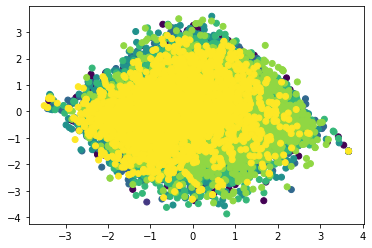

In [ ]:
# Analizzo i dati

# Capisco quanti oggetti e feature ho
nobj = x_train.shape[0]
nfeat = x_train.shape[1]
print(nobj, nfeat)

# Capisco come sono i dati: scatter plot con le prime 2 features
from matplotlib import pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.show()


In [ ]:
from sklearn.svm import SVC

# Inizializzo i parametri

kernel = 'rbf'
#degree = 5
#probability = True
# class_weight = dict or ‘balanced’, default=None
decision_function_shape = 'ovr'

max_iteration = 15000

# Inizializzo un modello di classificazione SVM per ognuna delle 7 classi

models = [SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True)]

In [ ]:
# Addestro i modelli

for i in range(7):
  models[i].fit(x_train, y_train==i)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
# Classifico i dati del testing set

predicted_scores = []
for i in range(7):
  predicted_scores.append(models[i].predict_proba(x_test)[:,1])

predicted_scores = np.asarray(predicted_scores)
predicted = np.argmax(predicted_scores,axis=0)

print(np.shape(predicted_scores))
print(np.shape(predicted))
print(predicted_scores[:7])
print(predicted[:20])

(7, 7178)
(7178,)
[[0.71680008 0.87211629 0.12554884 ... 0.12819242 0.13117312 0.06461671]
 [0.00168895 0.00416191 0.00269228 ... 0.00613134 0.00724697 0.00164922]
 [0.09356894 0.04328725 0.16529651 ... 0.10295222 0.06994689 0.16479681]
 ...
 [0.10653172 0.08025511 0.07976081 ... 0.25748093 0.07555488 0.09239966]
 [0.13134743 0.09010446 0.30389267 ... 0.11844964 0.07920918 0.09303658]
 [0.03595248 0.05748043 0.04212555 ... 0.01949876 0.67934278 0.95786005]]
[0 0 5 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0]


In [ ]:
# matrice di confusione

cmc = np.zeros((7,7))

for pr,y_te in zip(predicted,y_test):
  cmc[y_te,pr] += 1.0

In [ ]:
# calcolo accuratezza, precision e recall media rispetto alle 7 classi

accuracy = np.sum(cmc.diagonal())/np.sum(cmc)

precision = []
recall = []
for i in range(7):
  precision.append(cmc[i,i]/ np.sum(cmc[:,i]))
  recall.append(cmc[i,i]/ np.sum(cmc[i,:]))

precision = np.asarray(precision)
recall  = np.asarray(recall)

print(np.shape(precision))
print(np.shape(recall))

precision_m = np.mean(precision)
recall_m = np.mean(recall)

print(np.shape(precision_m))
print(np.shape(recall_m))
print(precision_m)
print(recall_m)

print('Accuratezza del classificatore: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precisione media del classificatore: ' + "{0:.2f}".format(precision_m))
print('Recall media del classificatore: ' + "{0:.2f}".format(recall_m))

(7,)
(7,)
()
()
0.7435466831598886
0.6825879911277986
Accuratezza del classificatore: 68.19%
Precisione media del classificatore: 0.74
Recall media del classificatore: 0.68


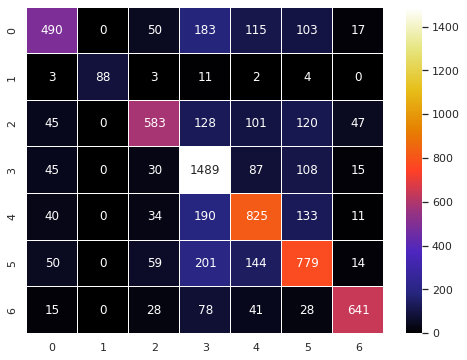

In [ ]:
# stampo la matrice di confusione

import seaborn as sns; 


plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc, annot=True,fmt=".0f", linewidths=.1, cmap="CMRmap")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")


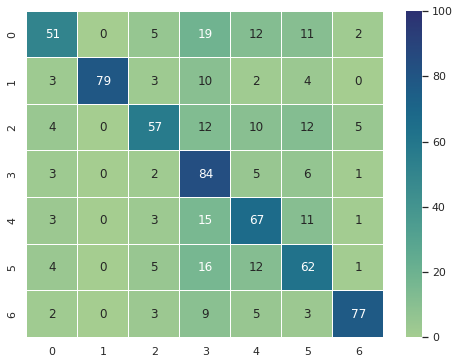

In [ ]:
# ATTENZIONE, con questo codice vengono cambiati i valori della matrice cmc
# viene fatto solo per plottare una matrice con le percentuali per ogni riga

cmc2 = cmc

for i in range(7):
  total = 0
  for j in range(7):
    total += cmc[i,j]
  for j in range(7):
    cmc2[i,j] = cmc[i,j]*100/total
  
plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc2, annot=True,vmin=0.0, vmax=100.0,fmt=".0f", linewidths=.1, cmap="crest")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")